C:\Users\vango\anaconda3\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] La procédure spécifiée est introuvable'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 10076822.79it/s]


Extracting ./MNIST/train\MNIST\raw\train-images-idx3-ubyte.gz to ./MNIST/train\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1804386.66it/s]


Extracting ./MNIST/train\MNIST\raw\train-labels-idx1-ubyte.gz to ./MNIST/train\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 8286950.84it/s]


Extracting ./MNIST/train\MNIST\raw\t10k-images-idx3-ubyte.gz to ./MNIST/train\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2104798.23it/s]

Extracting ./MNIST/train\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./MNIST/train\MNIST\raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 34424645.26it/s]


Extracting ./MNIST/test\MNIST\raw\train-images-idx3-ubyte.gz to ./MNIST/test\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1604403.78it/s]

Extracting ./MNIST/test\MNIST\raw\train-labels-idx1-ubyte.gz to ./MNIST/test\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 12841617.07it/s]


Extracting ./MNIST/test\MNIST\raw\t10k-images-idx3-ubyte.gz to ./MNIST/test\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 1513388.05it/s]


Extracting ./MNIST/test\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./MNIST/test\MNIST\raw



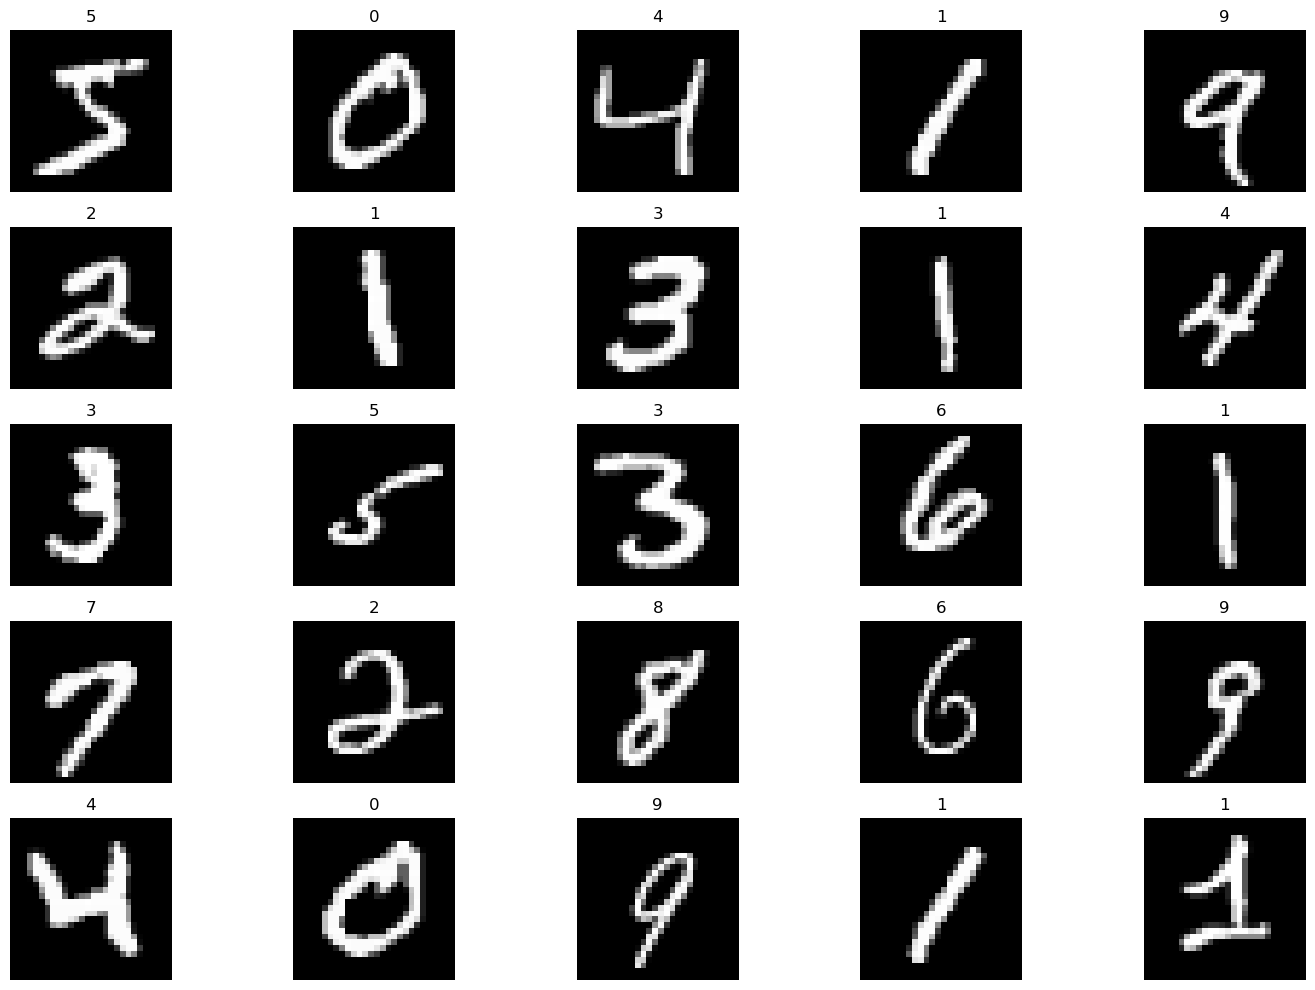

In [1]:
# Importing the necessary libraries 
import numpy as np 
import matplotlib.pyplot as plt 
import torchvision 
import torch 
plt.rcParams['figure.figsize'] = 15, 10

# Initializing the transform for the dataset 
transform = torchvision.transforms.Compose([ 
	torchvision.transforms.ToTensor(), 
	torchvision.transforms.Normalize((0.5), (0.5)) 
]) 

# Downloading the MNIST dataset 
train_dataset = torchvision.datasets.MNIST( 
	root="./MNIST/train", train=True, 
	transform=torchvision.transforms.ToTensor(), 
	download=True) 

test_dataset = torchvision.datasets.MNIST( 
	root="./MNIST/test", train=False, 
	transform=torchvision.transforms.ToTensor(), 
	download=True) 

# Creating Dataloaders from the 
# training and testing dataset 
train_loader = torch.utils.data.DataLoader( 
	train_dataset, batch_size=256) 
test_loader = torch.utils.data.DataLoader( 
	test_dataset, batch_size=256) 

# Printing 25 random images from the training dataset 
random_samples = np.random.randint( 
	1, len(train_dataset), (25)) 

for idx in range(random_samples.shape[0]): 
	plt.subplot(5, 5, idx + 1) 
	plt.imshow(train_dataset[idx][0][0].numpy(), cmap='gray') 
	plt.title(train_dataset[idx][1]) 
	plt.axis('off') 

plt.tight_layout() 
plt.show() 


In [2]:
# Creating a DeepAutoencoder class 
class DeepAutoencoder(torch.nn.Module): 
	def __init__(self): 
		super().__init__()		 
		self.encoder = torch.nn.Sequential( 
			torch.nn.Linear(28 * 28, 256), 
			torch.nn.ReLU(), 
			torch.nn.Linear(256, 128), 
			torch.nn.ReLU(), 
			torch.nn.Linear(128, 64), 
			torch.nn.ReLU(), 
			torch.nn.Linear(64, 10) 
		) 
		
		self.decoder = torch.nn.Sequential( 
			torch.nn.Linear(10, 64), 
			torch.nn.ReLU(), 
			torch.nn.Linear(64, 128), 
			torch.nn.ReLU(), 
			torch.nn.Linear(128, 256), 
			torch.nn.ReLU(), 
			torch.nn.Linear(256, 28 * 28), 
			torch.nn.Sigmoid() 
		) 

	def forward(self, x): 
		encoded = self.encoder(x) 
		decoded = self.decoder(encoded) 
		return decoded 

# Instantiating the model and hyperparameters 
model = DeepAutoencoder() 
criterion = torch.nn.MSELoss() 
num_epochs = 100
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3) 


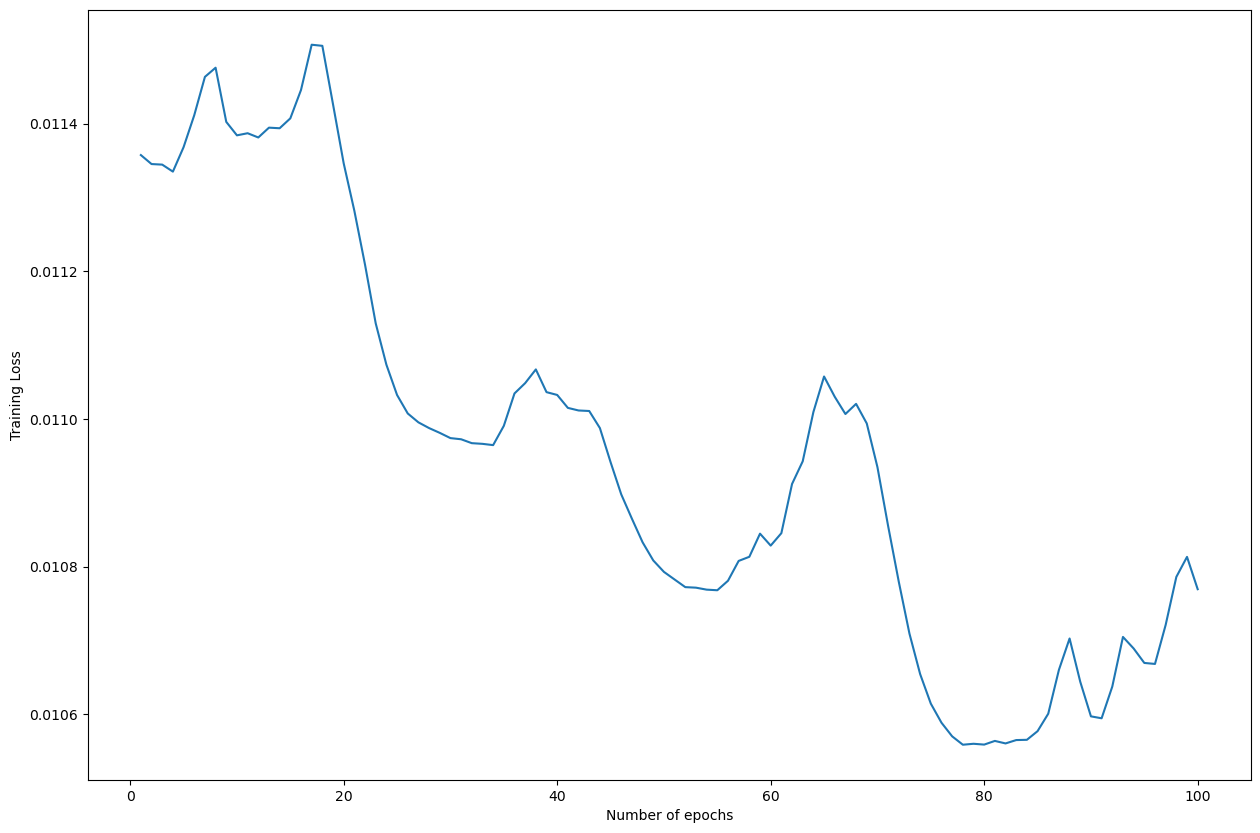

In [4]:
# List that will store the training loss 
train_loss = [] 

# Dictionary that will store the 
# different images and outputs for 
# various epochs 
outputs = {} 

batch_size = len(train_loader) 

# Training loop starts 
for epoch in range(num_epochs): 
		
	# Initializing variable for storing 
	# loss 
	running_loss = 0
	
	# Iterating over the training dataset 
	for batch in train_loader: 
			
		# Loading image(s) and 
		# reshaping it into a 1-d vector 
		img, _ = batch 
		img = img.reshape(-1, 28*28) 
		
		# Generating output 
		out = model(img) 
		
		# Calculating loss 
		loss = criterion(out, img) 
		
		# Updating weights according 
		# to the calculated loss 
		optimizer.zero_grad() 
		loss.backward() 
		optimizer.step() 
		
		# Incrementing loss 
		running_loss += loss.item() 
	
	# Averaging out loss over entire batch 
	running_loss /= batch_size 
	train_loss.append(running_loss) 
	
	# Storing useful images and 
	# reconstructed outputs for the last batch 
	outputs[epoch+1] = {'img': img, 'out': out} 


# Plotting the training loss 
plt.plot(range(1,num_epochs+1),train_loss) 
plt.xlabel("Number of epochs") 
plt.ylabel("Training Loss") 
plt.show()


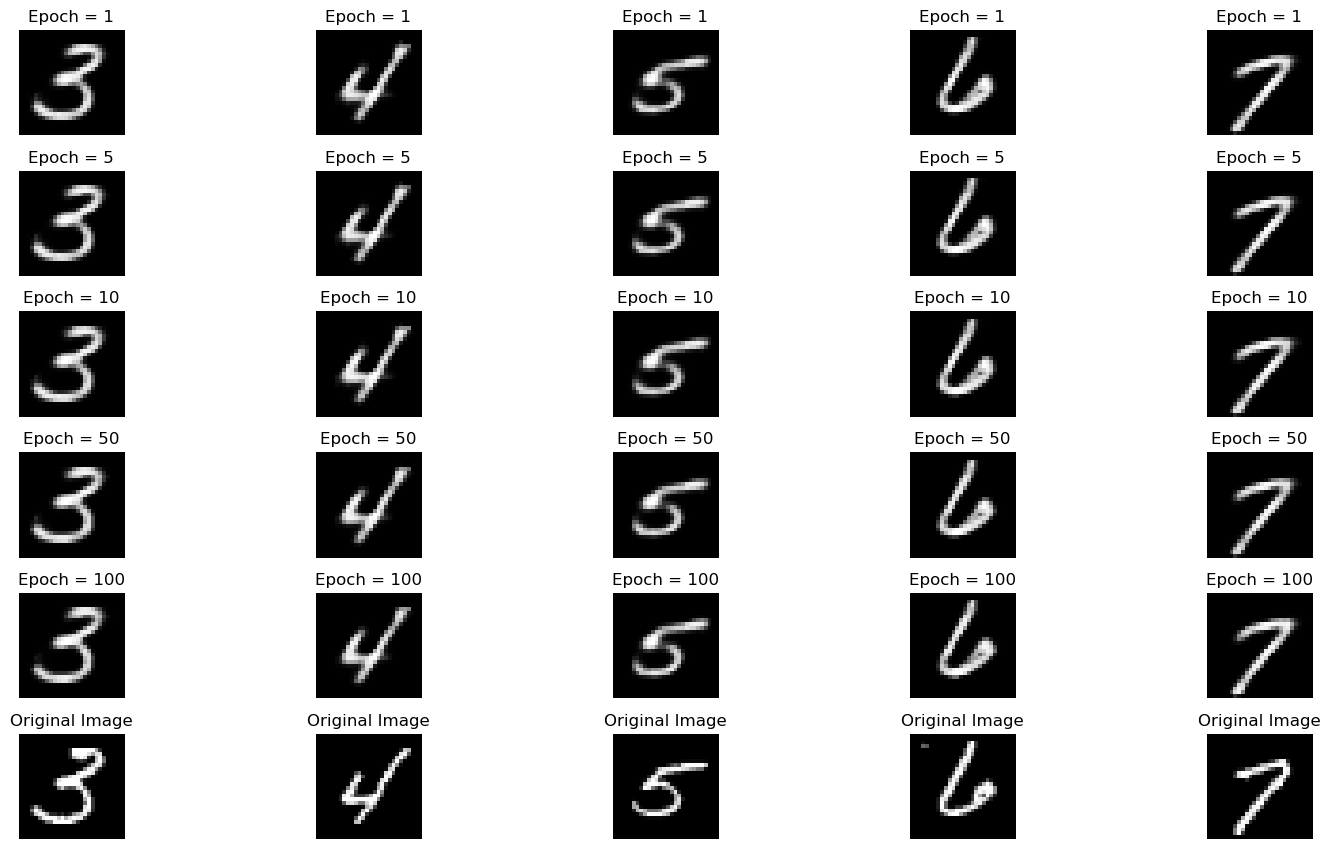

In [5]:
# Plotting is done on a 7x5 subplot 
# Plotting the reconstructed images 

# Initializing subplot counter 
counter = 1

# Plotting reconstructions 
# for epochs = [1, 5, 10, 50, 100] 
epochs_list = [1, 5, 10, 50, 100] 

# Iterating over specified epochs 
for val in epochs_list: 
	
	# Extracting recorded information 
	temp = outputs[val]['out'].detach().numpy() 
	title_text = f"Epoch = {val}"
	
	# Plotting first five images of the last batch 
	for idx in range(5): 
		plt.subplot(7, 5, counter) 
		plt.title(title_text) 
		plt.imshow(temp[idx].reshape(28,28), cmap= 'gray') 
		plt.axis('off') 
		
		# Incrementing the subplot counter 
		counter+=1

# Plotting original images 

# Iterating over first five 
# images of the last batch 
for idx in range(5): 
	
	# Obtaining image from the dictionary 
	val = outputs[10]['img'] 
	
	# Plotting image 
	plt.subplot(7,5,counter) 
	plt.imshow(val[idx].reshape(28, 28), 
			cmap = 'gray') 
	plt.title("Original Image") 
	plt.axis('off') 
	
	# Incrementing subplot counter 
	counter+=1

plt.tight_layout() 
plt.show()


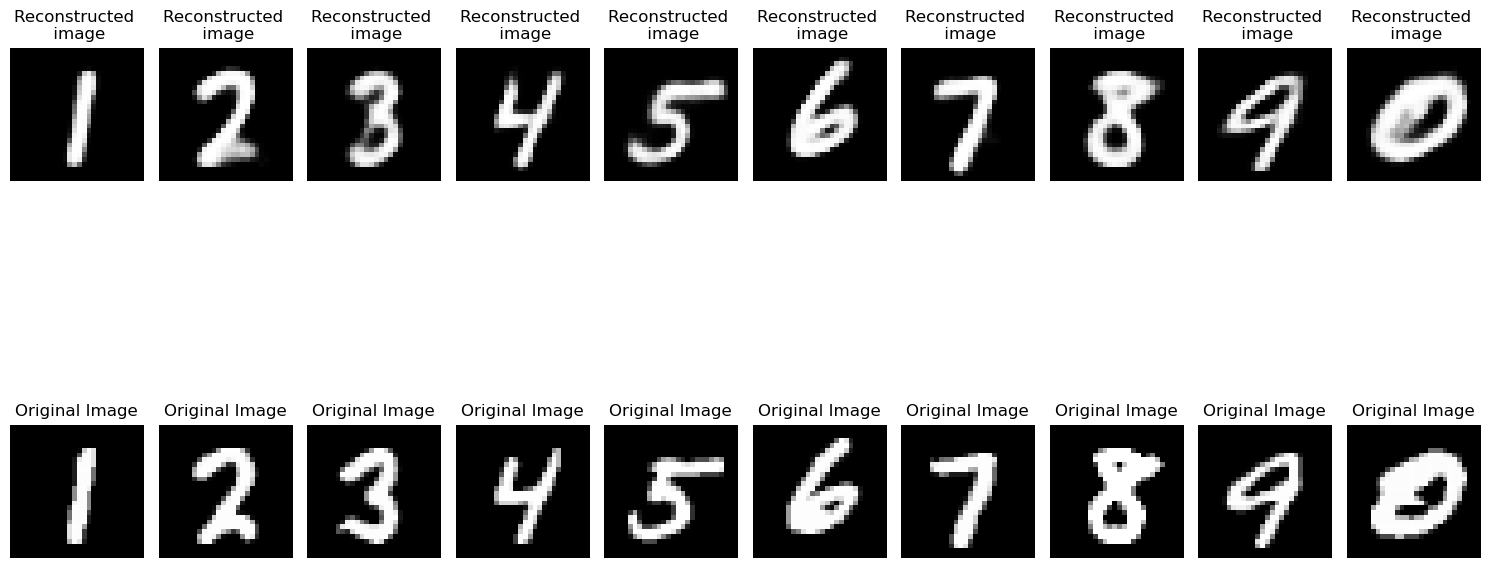

In [6]:
# Dictionary that will store the different 
# images and outputs for various epochs 
outputs = {} 

# Extracting the last batch from the test 
# dataset 
img, _ = list(test_loader)[-1] 

# Reshaping into 1d vector 
img = img.reshape(-1, 28 * 28) 

# Generating output for the obtained 
# batch 
out = model(img) 

# Storing information in dictionary 
outputs['img'] = img 
outputs['out'] = out 

# Plotting reconstructed images 
# Initializing subplot counter 
counter = 1
val = outputs['out'].detach().numpy() 

# Plotting first 10 images of the batch 
for idx in range(10): 
	plt.subplot(2, 10, counter) 
	plt.title("Reconstructed \n image") 
	plt.imshow(val[idx].reshape(28, 28), cmap='gray') 
	plt.axis('off') 

	# Incrementing subplot counter 
	counter += 1

# Plotting original images 

# Plotting first 10 images 
for idx in range(10): 
	val = outputs['img'] 
	plt.subplot(2, 10, counter) 
	plt.imshow(val[idx].reshape(28, 28), cmap='gray') 
	plt.title("Original Image") 
	plt.axis('off') 

	# Incrementing subplot counter 
	counter += 1

plt.tight_layout() 
plt.show() 
